In [262]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.preprocessing import StandardScaler
from IPython.display import display
from sklearn.metrics import r2_score as r2, mean_squared_error as mn, confusion_matrix, accuracy_score,precision_score,recall_score,f1_score, classification_report
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [261]:
# load data set
df = pd.read_excel('Banking_call_Data.xlsx')

In [263]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [264]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [265]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [266]:
df.shape

(45211, 17)

In [267]:
df_updated = df.drop(['day','duration'], axis = 1)

In [268]:
df_updated

,age,job,marital,education,default,balance,housing,loan,contact,month,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,may,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,may,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,may,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,may,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,may,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,nov,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,nov,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,nov,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,nov,4,-1,0,unknown,no


In [269]:
# encode the tragert varible 
#df_updated['y'] = df_updated['y'].map({'yes':1,'no':0})

In [270]:
#df_updated.head()

In [271]:
df_updated['job'].value_counts()

job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: count, dtype: int64

In [272]:
df_updated['marital'].value_counts()

marital
married     27214
single      12790
divorced     5207
Name: count, dtype: int64

In [273]:
df_updated['education'].value_counts()

education
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: count, dtype: int64

In [274]:
df_updated['default'].value_counts()

default
no     44396
yes      815
Name: count, dtype: int64

In [275]:
df_updated['balance'].value_counts()

balance
 0        3514
 1         195
 2         156
 4         139
 3         134
          ... 
-381         1
 4617        1
 20584       1
 4358        1
 16353       1
Name: count, Length: 7168, dtype: int64

In [276]:
df_updated['housing'].value_counts()

housing
yes    25130
no     20081
Name: count, dtype: int64

In [277]:
df_updated['loan'].value_counts()

loan
no     37967
yes     7244
Name: count, dtype: int64

In [278]:
df_updated['contact'].value_counts()

contact
cellular     29285
unknown      13020
telephone     2906
Name: count, dtype: int64

In [279]:
df_updated['month'].value_counts()

month
may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: count, dtype: int64

In [280]:
df_updated['campaign'].value_counts()

campaign
1     17544
2     12505
3      5521
4      3522
5      1764
6      1291
7       735
8       540
9       327
10      266
11      201
12      155
13      133
14       93
15       84
16       79
17       69
18       51
19       44
20       43
21       35
22       23
25       22
23       22
24       20
29       16
28       16
26       13
31       12
27       10
32        9
30        8
33        6
34        5
36        4
35        4
43        3
38        3
37        2
50        2
41        2
46        1
58        1
55        1
63        1
51        1
39        1
44        1
Name: count, dtype: int64

In [281]:
df_updated['pdays'].value_counts()

pdays
-1      36954
 182      167
 92       147
 91       126
 183      126
        ...  
 449        1
 452        1
 648        1
 595        1
 530        1
Name: count, Length: 559, dtype: int64

In [282]:
df_updated['previous'].value_counts()

previous
0      36954
1       2772
2       2106
3       1142
4        714
5        459
6        277
7        205
8        129
9         92
10        67
11        65
12        44
13        38
15        20
14        19
17        15
16        13
19        11
20         8
23         8
18         6
22         6
24         5
27         5
21         4
29         4
25         4
30         3
38         2
37         2
26         2
28         2
51         1
275        1
58         1
32         1
40         1
55         1
35         1
41         1
Name: count, dtype: int64

In [283]:
df_updated['poutcome'].value_counts()

poutcome
unknown    36959
failure     4901
other       1840
success     1511
Name: count, dtype: int64

In [284]:
#categorical_cols = ['job','marital','education','default','balance','housing','loan','contact','month','campaign','pdays','previous','poutcome']
df_cat = pd.get_dummies(df_updated[['job','marital','education','default','balance','housing','loan','contact','month','campaign','pdays','previous','poutcome']],drop_first = True)
#numerical_cols = [col for col in df_updated.columns if col not in categorical_cols]
#df_num = df_updated[numerical_cols]
#df_final = pd.concat([df_num,df_cat],axis = 1)

In [285]:
df_cat.head()

,balance,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,2143,1,-1,0,False,False,False,True,False,False,...,False,False,False,True,False,False,False,False,False,True
1,29,1,-1,0,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,True
2,2,1,-1,0,False,True,False,False,False,False,...,False,False,False,True,False,False,False,False,False,True
3,1506,1,-1,0,True,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,True
4,1,1,-1,0,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,True


In [286]:
df_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   month      45211 non-null  object
 10  campaign   45211 non-null  int64 
 11  pdays      45211 non-null  int64 
 12  previous   45211 non-null  int64 
 13  poutcome   45211 non-null  object
 14  y          45211 non-null  object
dtypes: int64(5), object(10)
memory usage: 5.2+ MB


In [287]:
df_final = pd.concat([df_updated[['age','y']],df_cat],axis = 1)

In [288]:
df_final.head()

,age,y,balance,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,58,no,2143,1,-1,0,False,False,False,True,...,False,False,False,True,False,False,False,False,False,True
1,44,no,29,1,-1,0,False,False,False,False,...,False,False,False,True,False,False,False,False,False,True
2,33,no,2,1,-1,0,False,True,False,False,...,False,False,False,True,False,False,False,False,False,True
3,47,no,1506,1,-1,0,True,False,False,False,...,False,False,False,True,False,False,False,False,False,True
4,33,no,1,1,-1,0,False,False,False,False,...,False,False,False,True,False,False,False,False,False,True


In [289]:
df_final['subscribed/no'] = df['y'].map({'yes':1,'no':0})
df_final = df_final.drop('y',axis = 1)

In [290]:
df_final.head()

,age,balance,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,subscribed/no
0,58,2143,1,-1,0,False,False,False,True,False,...,False,False,True,False,False,False,False,False,True,0
1,44,29,1,-1,0,False,False,False,False,False,...,False,False,True,False,False,False,False,False,True,0
2,33,2,1,-1,0,False,True,False,False,False,...,False,False,True,False,False,False,False,False,True,0
3,47,1506,1,-1,0,True,False,False,False,False,...,False,False,True,False,False,False,False,False,True,0
4,33,1,1,-1,0,False,False,False,False,False,...,False,False,True,False,False,False,False,False,True,0


In [291]:
df_final.isnull().sum()

age                    0
balance                0
campaign               0
pdays                  0
previous               0
job_blue-collar        0
job_entrepreneur       0
job_housemaid          0
job_management         0
job_retired            0
job_self-employed      0
job_services           0
job_student            0
job_technician         0
job_unemployed         0
job_unknown            0
marital_married        0
marital_single         0
education_secondary    0
education_tertiary     0
education_unknown      0
default_yes            0
housing_yes            0
loan_yes               0
contact_telephone      0
contact_unknown        0
month_aug              0
month_dec              0
month_feb              0
month_jan              0
month_jul              0
month_jun              0
month_mar              0
month_may              0
month_nov              0
month_oct              0
month_sep              0
poutcome_other         0
poutcome_success       0
poutcome_unknown       0


In [292]:
df_final.duplicated().sum()

132

In [293]:
df_final = df_final.drop_duplicates()

In [294]:
df_final.duplicated().sum()

0

In [295]:
df_final.columns

Index(['age', 'balance', 'campaign', 'pdays', 'previous', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'job_unknown', 'marital_married', 'marital_single',
       'education_secondary', 'education_tertiary', 'education_unknown',
       'default_yes', 'housing_yes', 'loan_yes', 'contact_telephone',
       'contact_unknown', 'month_aug', 'month_dec', 'month_feb', 'month_jan',
       'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov',
       'month_oct', 'month_sep', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown', 'subscribed/no'],
      dtype='object')

In [296]:
df_final.shape

(45079, 41)

In [297]:
df_final.corr()

,age,balance,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,subscribed/no
age,1.000000,0.097604,0.004780,-0.024078,0.001112,-0.044137,0.021704,0.086364,-0.022854,0.447397,...,0.050889,0.019446,-0.127330,0.032595,0.060089,0.032372,-0.023137,0.035433,-0.000485,0.024930
balance,0.097604,1.000000,-0.014775,0.002906,0.016355,-0.048937,0.009466,0.001814,0.068690,0.046842,...,0.029505,0.023070,-0.071529,0.116904,0.040044,0.021782,0.008203,0.035012,-0.029679,0.052394
campaign,0.004780,-0.014775,1.000000,-0.088883,-0.032988,0.009234,0.002122,0.003367,0.016534,-0.030861,...,0.044153,-0.018669,-0.067374,-0.084897,-0.051121,-0.036792,-0.020210,-0.057606,0.108273,-0.073390
pdays,-0.024078,0.002906,-0.088883,1.000000,0.454671,0.020019,-0.014383,-0.031299,-0.007255,-0.006432,...,-0.113738,0.031886,0.078881,0.007521,0.056674,0.084313,0.389664,0.228383,-0.869893,0.103229
previous,0.001112,0.016355,-0.032988,0.454671,1.000000,-0.017166,-0.008289,-0.015160,0.020022,0.005757,...,-0.060905,0.027199,0.001182,0.037648,0.053845,0.064913,0.306511,0.201316,-0.532638,0.092994
job_blue-collar,-0.044137,-0.048937,0.009234,0.020019,-0.017166,1.000000,-0.096719,-0.087884,-0.268923,-0.120351,...,0.021477,-0.041516,0.164785,-0.048155,-0.042492,-0.044897,0.001306,-0.053182,0.022319,-0.072261
job_entrepreneur,0.021704,0.009466,0.002122,-0.014383,-0.008289,-0.096719,1.000000,-0.030974,-0.094780,-0.042417,...,0.015521,-0.016665,-0.009959,0.050915,-0.012070,-0.007819,-0.013597,-0.019197,0.015108,-0.019825
job_housemaid,0.086364,0.001814,0.003367,-0.031299,-0.015160,-0.087884,-0.030974,1.000000,-0.086122,-0.038542,...,0.052266,-0.000076,-0.066480,-0.013277,0.006211,-0.002233,-0.016743,-0.009338,0.025977,-0.015116
job_management,-0.022854,0.068690,0.016534,-0.007255,0.020022,-0.268923,-0.094780,-0.086122,1.000000,-0.117938,...,-0.031870,0.023753,-0.083803,0.051632,0.009929,0.023391,0.002549,0.021798,-0.014529,0.033575
job_retired,0.447397,0.046842,-0.030861,-0.006432,0.005757,-0.120351,-0.042417,-0.038542,-0.117938,1.000000,...,0.010653,0.041812,-0.073935,-0.022252,0.077705,0.061364,-0.004751,0.055489,-0.019266,0.079236


<Axes: >

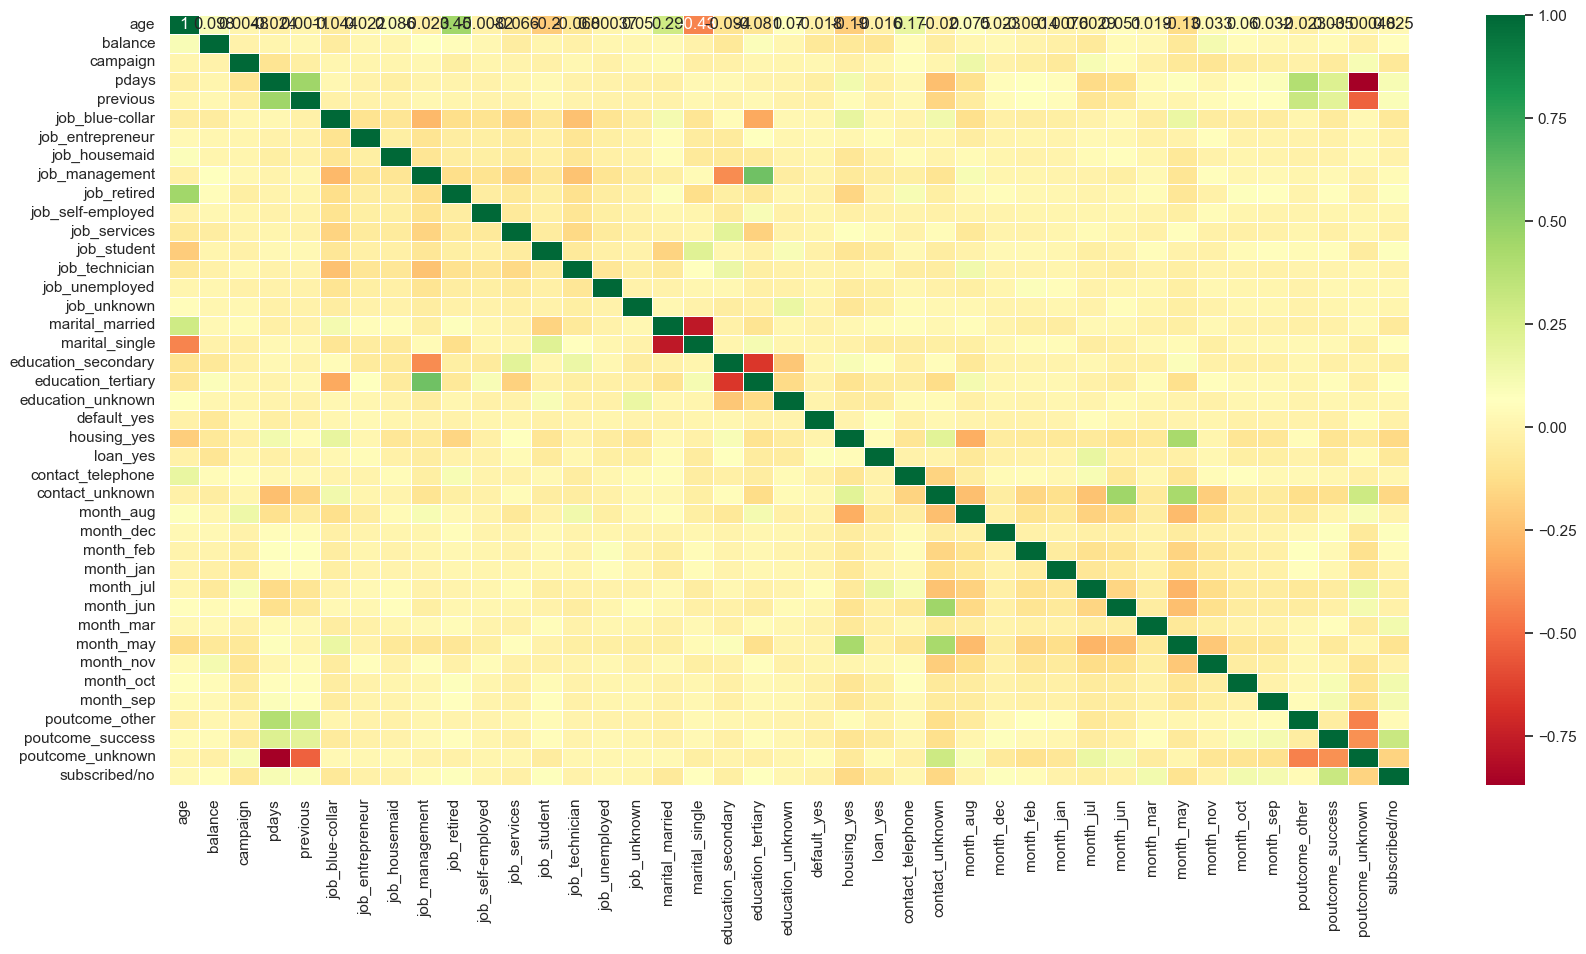

In [298]:
plt.figure(figsize=(20,10))
sns.heatmap(df_final.corr(),cmap = 'RdYlGn',annot = True,linewidth = 0.5)

In [299]:
# split the target varible and features
x = df_final.iloc[:,0:40].values

In [300]:
y = df_final.iloc[:,40].values

In [301]:
y

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [302]:
x.shape

(45079, 40)

In [303]:
y.shape

(45079,)

In [304]:
# train and test split the data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 50)

In [305]:
x_train.shape

(36063, 40)

In [306]:
x_test.shape

(9016, 40)

In [307]:
y_train.shape

(36063,)

In [308]:
y_test.shape

(9016,)

In [309]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
x_resampled, y_resampled = smote.fit_resample(x_train, y_train)

In [310]:
# instaling and fitting the model to train data
log_reg = LogisticRegression(class_weight='balanced', max_iter=1000)
log_reg.fit(x_resampled,y_resampled)

LogisticRegression(class_weight='balanced', max_iter=1000)

In [311]:

# feature scalling
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [312]:
# prediction for test dataset

In [313]:
y_test_pred = log_reg.predict(x_test)

In [314]:
y_test_pred

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [315]:
y_test

array([0, 0, 1, ..., 0, 0, 1], dtype=int64)

In [316]:
# confusion matrix

In [317]:
conf_matrix = confusion_matrix(y_test,y_test_pred)

In [318]:
conf_matrix

array([[6238, 1744],
       [ 386,  648]], dtype=int64)

<Axes: >

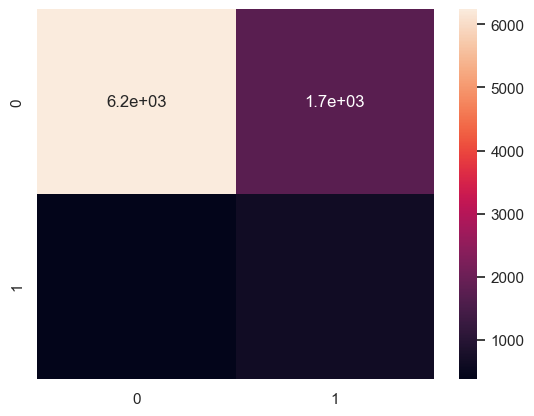

In [319]:
sns.heatmap(conf_matrix,annot = True)

In [320]:
# accuracy,precision,recall

In [321]:
from sklearn import metrics
print("Accuracy :",metrics.accuracy_score(y_test,y_test_pred))

Accuracy : 0.7637533274179237


In [322]:
print("Precision :",metrics.precision_score(y_test,y_test_pred))

Precision : 0.2709030100334448


In [323]:
print("Recall :",metrics.recall_score(y_test,y_test_pred))

Recall : 0.6266924564796905


In [324]:
print("F1-score :",metrics.f1_score(y_test,y_test_pred))

F1-score : 0.3782837127845884


In [325]:
print("Accuracy :",metrics.accuracy_score(y_test,y_test_pred))
print("classification_report :",metrics.classification_report(y_test,y_test_pred))
print("Confusion_matrix :",metrics.confusion_matrix(y_test,y_test_pred))


Accuracy : 0.7637533274179237
classification_report :               precision    recall  f1-score   support

           0       0.94      0.78      0.85      7982
           1       0.27      0.63      0.38      1034

    accuracy                           0.76      9016
   macro avg       0.61      0.70      0.62      9016
weighted avg       0.86      0.76      0.80      9016

Confusion_matrix : [[6238 1744]
 [ 386  648]]


[[6238 1744]   → 1744 false positives (class 0 misclassified as 1)
 
 [ 386  648]]  → 648 true positives (class 1 correctly identified)


* Class 0 (Majority – "No")

- Precision: 94%

- Recall: 78%

- F1-score: 85%

→ Strong performance, though recall dropped slightly compared to the previous run.

* Class 1 (Minority – "Yes")

- Precision: 27%

- Recall: 63%

- F1-score: 38%

→ Better balance than before: still catching more than half of class 1, with a small gain in precision.

The Logistic Regression model achieved 76.38% accuracy, showing strong performance on the majority class and moderate success on the minority class by detecting 63% of actual positive cases, albeit with low precision (27%). This model offers a better trade-off between detecting positive cases and overall accuracy compared to the previous version.

In [326]:
#ROC and AUC 

In [327]:
y_pred_proba = log_reg.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)


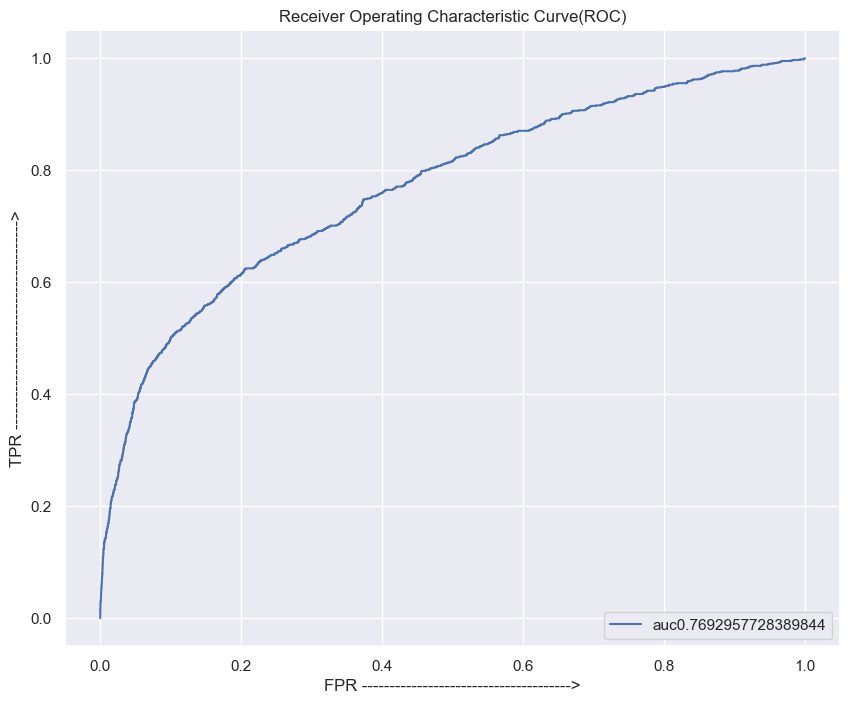

In [328]:
plt.figure(figsize=(10,8))
plt.plot(fpr,tpr,label = "auc" + str(auc))
plt.legend(loc = 4)
plt.title("Receiver Operating Characteristic Curve(ROC)")
plt.xlabel("FPR -------------------------------------->")
plt.ylabel("TPR -------------------------------------->")
plt.show()

# Random Forest Classification

In [329]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE

In [330]:
plt.style.use('ggplot')

In [331]:
pd.set_option('display.max_columns',300)

In [332]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [333]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [334]:
# onehot encoding
df_onehot =  pd.get_dummies(df[['job','contact','month','poutcome','marital','education']],drop_first = True)

In [335]:
df_onehot

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,contact_telephone,contact_unknown,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown
0,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True,True,False,False,True,False
1,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,True,True,False,False
2,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True,True,False,True,False,False
3,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True,True,False,False,False,True
4,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,True,False,False,True,False
45207,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False
45208,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,True,False,True,False,False
45209,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,True,False,True,False,False


In [336]:

if 'job' in df.columns:
    df = df.drop('job',axis = 1)
if 'contact' in df.columns:
    df = df.drop('contact',axis = 1)
if 'month' in df.columns:
    df = df.drop('month',axis = 1)
if 'poutcome' in df.columns:
    df = df.drop('poutcome',axis = 1)
if 'marital' in df.columns:
    df = df.drop('marital',axis = 1)
if 'education' in df.columns:
    df = df.drop('education',axis = 1)

In [337]:
df.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,y
0,58,no,2143,yes,no,5,261,1,-1,0,no
1,44,no,29,yes,no,5,151,1,-1,0,no
2,33,no,2,yes,yes,5,76,1,-1,0,no
3,47,no,1506,yes,no,5,92,1,-1,0,no
4,33,no,1,no,no,5,198,1,-1,0,no


In [338]:
# label encoding
df['default'] = df['default'].map({'yes':1,'no':0})

In [339]:
df['housing'] = df['housing'].map({'yes':1,'no':0})
df['loan'] = df['loan'].map({'yes':1,'no':0})
df['y'] = df['y'].map({'yes':1,'no':0})

In [340]:
df.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,y
0,58,0,2143,1,0,5,261,1,-1,0,0
1,44,0,29,1,0,5,151,1,-1,0,0
2,33,0,2,1,1,5,76,1,-1,0,0
3,47,0,1506,1,0,5,92,1,-1,0,0
4,33,0,1,0,0,5,198,1,-1,0,0


In [341]:
df_updated = pd.concat([df,df_onehot],axis = 1)

In [342]:
df_updated.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,y,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,contact_telephone,contact_unknown,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown
0,58,0,2143,1,0,5,261,1,-1,0,0,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True,True,False,False,True,False
1,44,0,29,1,0,5,151,1,-1,0,0,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,True,True,False,False
2,33,0,2,1,1,5,76,1,-1,0,0,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True,True,False,True,False,False
3,47,0,1506,1,0,5,92,1,-1,0,0,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True,True,False,False,False,True
4,33,0,1,0,0,5,198,1,-1,0,0,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,True,False,False,True


In [343]:
df_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 43 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  45211 non-null  int64
 1   default              45211 non-null  int64
 2   balance              45211 non-null  int64
 3   housing              45211 non-null  int64
 4   loan                 45211 non-null  int64
 5   day                  45211 non-null  int64
 6   duration             45211 non-null  int64
 7   campaign             45211 non-null  int64
 8   pdays                45211 non-null  int64
 9   previous             45211 non-null  int64
 10  y                    45211 non-null  int64
 11  job_blue-collar      45211 non-null  bool 
 12  job_entrepreneur     45211 non-null  bool 
 13  job_housemaid        45211 non-null  bool 
 14  job_management       45211 non-null  bool 
 15  job_retired          45211 non-null  bool 
 16  job_self-employed    4

In [344]:
df_updated.isnull().sum()

age                    0
default                0
balance                0
housing                0
loan                   0
day                    0
duration               0
campaign               0
pdays                  0
previous               0
y                      0
job_blue-collar        0
job_entrepreneur       0
job_housemaid          0
job_management         0
job_retired            0
job_self-employed      0
job_services           0
job_student            0
job_technician         0
job_unemployed         0
job_unknown            0
contact_telephone      0
contact_unknown        0
month_aug              0
month_dec              0
month_feb              0
month_jan              0
month_jul              0
month_jun              0
month_mar              0
month_may              0
month_nov              0
month_oct              0
month_sep              0
poutcome_other         0
poutcome_success       0
poutcome_unknown       0
marital_married        0
marital_single         0


In [345]:
df_updated.duplicated().sum()

0

In [346]:
df_updated.describe()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,y
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,0.018027,1362.272058,0.555838,0.160226,15.806419,258.163080,2.763841,40.197828,0.580323,0.116985
std,10.618762,0.133049,3044.765829,0.496878,0.366820,8.322476,257.527812,3.098021,100.128746,2.303441,0.321406
min,18.000000,0.000000,-8019.000000,0.000000,0.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000
25%,33.000000,0.000000,72.000000,0.000000,0.000000,8.000000,103.000000,1.000000,-1.000000,0.000000,0.000000
50%,39.000000,0.000000,448.000000,1.000000,0.000000,16.000000,180.000000,2.000000,-1.000000,0.000000,0.000000
75%,48.000000,0.000000,1428.000000,1.000000,0.000000,21.000000,319.000000,3.000000,-1.000000,0.000000,0.000000
max,95.000000,1.000000,102127.000000,1.000000,1.000000,31.000000,4918.000000,63.000000,871.000000,275.000000,1.000000


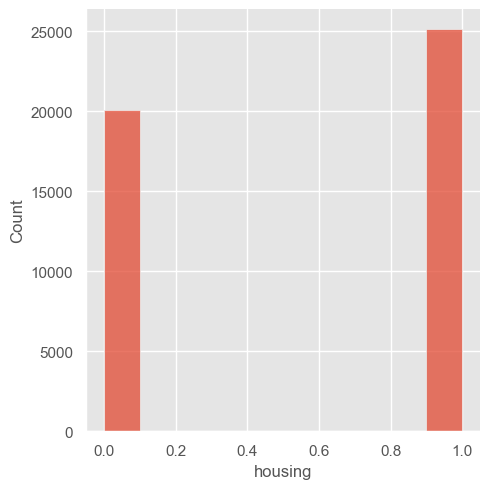

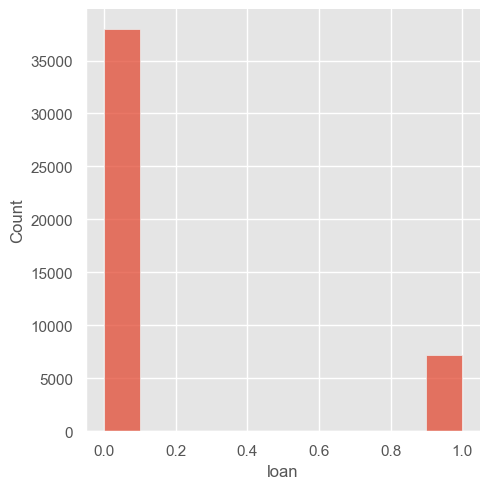

In [347]:
sns.displot(x = df['housing'], data = df['y'],bins = 10)
sns.displot(x = df['loan'], data = df['y'],bins = 10)

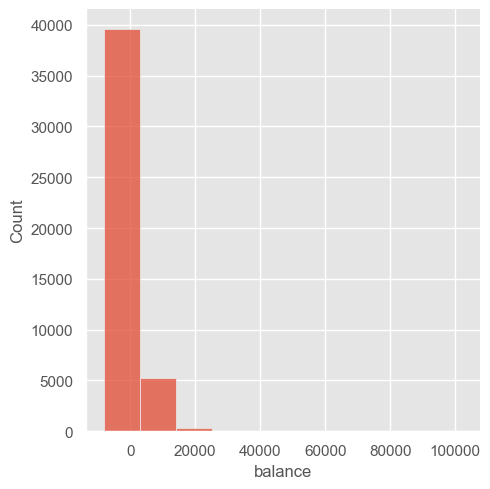

In [348]:
sns.displot(x = df['balance'], data = df['y'],bins = 10)

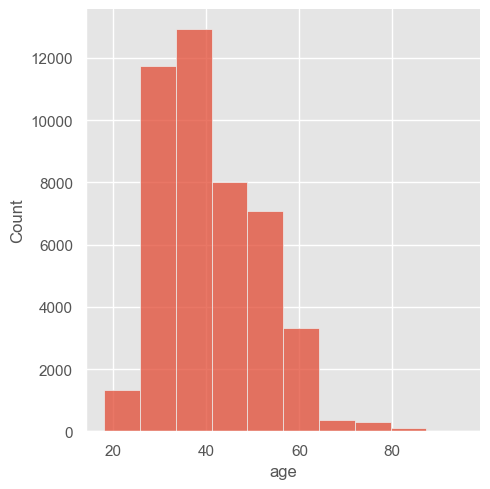

In [349]:
sns.displot(x = df['age'], data = df['y'],bins = 10)

In [350]:
# split the data into features and target

In [351]:
x = df_updated.iloc[:,df_updated.columns!= 'y']
y = df_updated.iloc[:,df_updated.columns == 'y']

In [352]:
x

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,contact_telephone,contact_unknown,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown
0,58,0,2143,1,0,5,261,1,-1,0,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True,True,False,False,True,False
1,44,0,29,1,0,5,151,1,-1,0,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,True,True,False,False
2,33,0,2,1,1,5,76,1,-1,0,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True,True,False,True,False,False
3,47,0,1506,1,0,5,92,1,-1,0,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True,True,False,False,False,True
4,33,0,1,0,0,5,198,1,-1,0,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,0,825,0,0,17,977,3,-1,0,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,True,False,False,True,False
45207,71,0,1729,0,0,17,456,2,-1,0,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False
45208,72,0,5715,0,0,17,1127,5,184,3,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,True,False,True,False,False
45209,57,0,668,0,0,17,508,4,-1,0,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,True,False,True,False,False


In [353]:
y

,y
0,0
1,0
2,0
3,0
4,0
...,...
45206,1
45207,1
45208,1
45209,0


In [354]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [355]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.2,random_state = 20)

In [356]:
smote = SMOTE(random_state=42)
x_train_sm, y_train_sm = smote.fit_resample(x_train, y_train)

In [357]:
fit_rf = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)

In [358]:
fit_rf.fit(x_train_sm,y_train_sm)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [359]:
# predict on test data

In [360]:
y_pred = fit_rf.predict(x_test)

<Axes: >

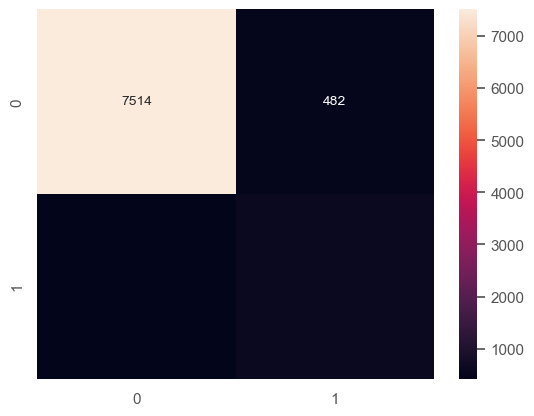

In [361]:
conf_mat = confusion_matrix(y_test,y_pred)
sns.heatmap(conf_mat,annot = True,fmt = 'd')

In [362]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.899922592060157

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.94      0.94      7996
           1       0.56      0.60      0.58      1047

    accuracy                           0.90      9043
   macro avg       0.76      0.77      0.76      9043
weighted avg       0.90      0.90      0.90      9043


Confusion Matrix:
 [[7514  482]
 [ 423  624]]


[[7514  482]   → 482 false positives (class 0 predicted as 1)

[ 423  624]]  → 624 true positives (class 1 correctly identified)

- The model has significantly fewer false negatives and false positives compared to Logistic Regression.

- Better at detecting the minority class with a reasonable trade-off between precision and recall.

- Higher overall accuracy (~90%)

- Much better minority class detection (60% recall and 56% precision)

- Strong performance in the majority class as well

In [363]:
accuracy_rf = accuracy_score(y_test,y_pred)
test_error_rate = 1 - accuracy_rf

In [364]:
test_error_rate

0.10007740793984299

In [365]:
## 0.1001 (or 10.01%)
## means your model makes incorrect predictions on roughly 10 out of every 100 test samples.

In [366]:
# Area Under the Curve(AUC)

In [367]:
from sklearn import metrics
prediction_prob = fit_rf.predict_proba(x_test)[::,1]
fpr2, tpr2, _ = metrics.roc_curve(y_test,prediction_prob)
auc_rf = metrics.roc_auc_score(y_test,prediction_prob)

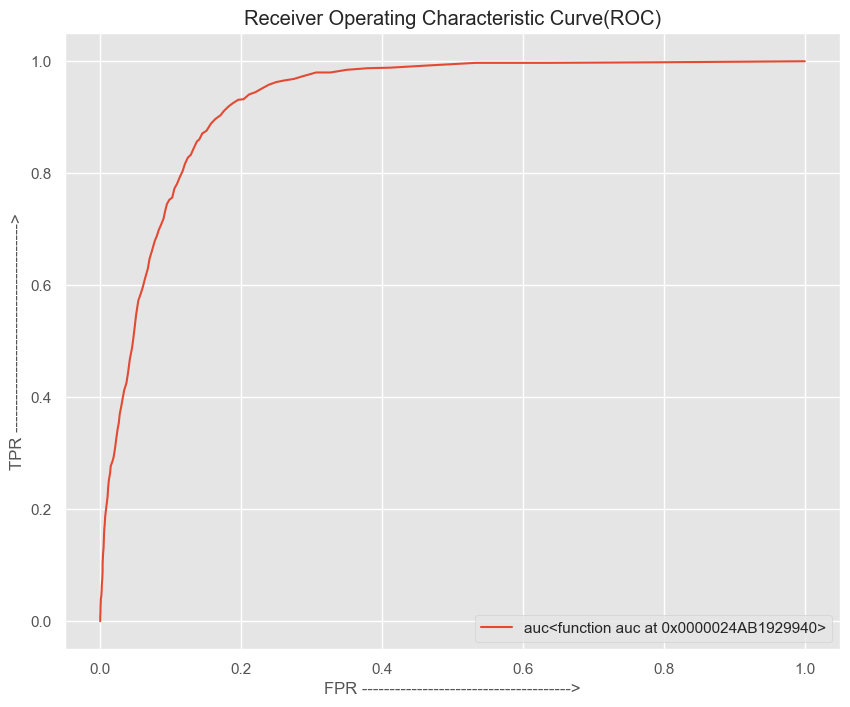

In [368]:

plt.figure(figsize=(10,8))
plt.plot(fpr2,tpr2,label = "auc" + str(auc))
plt.legend(loc = 4)
plt.title("Receiver Operating Characteristic Curve(ROC)")
plt.xlabel("FPR -------------------------------------->")
plt.ylabel("TPR -------------------------------------->")
plt.show()

1. Logistic Regression

Accuracy: ~76.4%

Class 0 (“No”):

Precision: 94%

Recall: 78%

F1-score: 85%

Class 1 (“Yes”):

Precision: 27%

Recall: 63%

F1-score: 38%

Strengths:

Good at detecting many positive cases (high recall for class 1)

Simple and interpretable model

Weaknesses:

Low precision for class 1, causing many false alarms

Lower overall accuracy compared to Random Forest

2. Random Forest Classifier

Accuracy: ~90%

Class 0 (“No”):

Precision: 95%

Recall: 94%

F1-score: 94%

Class 1 (“Yes”):

Precision: 56%

Recall: 60%

F1-score: 58%

Strengths:

Much higher accuracy and better balance of precision and recall on minority class

Effectively reduces false positives and false negatives

Weaknesses:

Less interpretable than Logistic Regression

Slightly lower recall for class 1 compared to Logistic Regression, but better precision

Overall Recommendation

Random Forest is the better performing model with significantly higher accuracy and better balanced detection of the minority class.

Logistic Regression could be preferred if interpretability is a priority or if higher recall on class 1 at the cost of precision is acceptable.